## BFP Image Class Test
This is to test the BFP class. Most of the functions will be tested in this file

In [1]:
import numpy as np
import datetime
from class_BFP_Image_QD import BFP_Image_QD
from scipy.optimize import curve_fit
import Fun_BFP_Image
import matplotlib.pyplot as plt

## Basic Parameters are defined here

In [2]:
WL0 = 580e-9
nUp = 2
nDn = 2

# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 50e-9
dl[3] = 70e-9
dl[2] = 50e-9
dl[1] = -50e-9
dl[0] = -150e-9

# The position of the dipole
POSD = dl[nDn - 1] + dis

# Dipole direction
phi = np.pi / 2 + np.pi / 6
dx = np.sin(16 / 180 * np.pi) * np.cos(phi)
dy = np.sin(16 / 180 * np.pi) * np.sin(phi)
dz = np.cos(16 / 180 * np.pi)
p0 = np.array([dx, dy, dz])
# p0 = np.array([0, 0, 1])

# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)

Eplist[4] = 1.5**2  # Glass
Eplist[3] = -7.3734 + 1.1016 * 1j
Eplist[2] = 1.85**2
Eplist[1] = -7.3734 + 1.1016 * 1j
Eplist[0] = 1

D1 = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 200
num_ky = 200
NA = 1.5
kx = np.linspace(-1 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
ky = np.linspace(-1 + 1e-5, 1 + 1e-5, num_ky) * D1.k0 * NA
kx_grid, ky_grid = np.meshgrid(kx, ky)

2021-08-27 21:19:24:The Basic Parameters Have Been Initialized!!!


now we can see the structures as follows

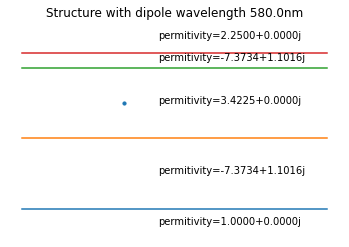

In [3]:
D1.Show_Structure()

In [4]:
# Initialize the Green Function
D1.Cal_Green_List(kx_grid, ky_grid)

2021-08-27 21:20:14: The Green Function Has Been Prepared


0

In [8]:
# To calculate and plot the pattern for a given p0
nP_Test1 = D1.Cal_PatternUp_List_QD_p1p2(p0,p0)

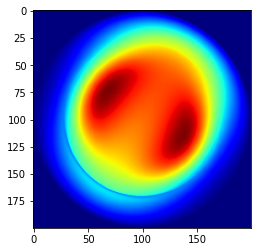

In [9]:
fig1 = plt.figure()
plt.imshow(nP_Test1, cmap='jet')
plt.show()

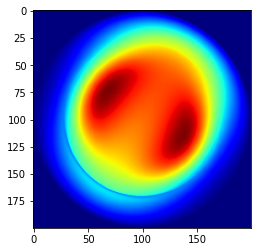

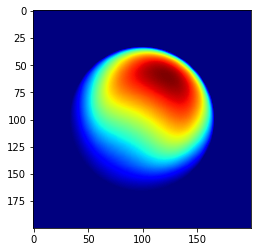

In [11]:
# Or use another function to calculate the pattern for a given 1D dipole
nPUp_Test1,nPDn_Test1=D1.Cal_Pattern_List_QD_p1(p0)
fig1 = plt.figure()
plt.imshow(nPUp_Test1, cmap='jet')
plt.show()
fig1 = plt.figure()
plt.imshow(nPDn_Test1, cmap='jet')
plt.show()

In [12]:
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid_in = krho_grid*np.cos(kphi_grid)
ky_grid_in = krho_grid*np.sin(kphi_grid)

nP_Test2 = Fun_BFP_Image.Grid_Data_TZH(
    kx_grid, ky_grid, nP_Test1, kx_grid_in, ky_grid_in)

In [13]:
p_rho, p_phi = D1.Trans_XY_to_RhoPhi(
    kx_grid, ky_grid, nP_Test1, kx_grid_in, ky_grid_in)

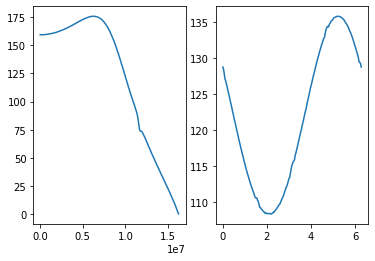

In [15]:
fig1=plt.figure()
plt.subplot(121)
plt.plot(krho, p_rho)
plt.subplot(122)
plt.plot(kphi, p_phi)

In [16]:
angle_exp = np.array([np.pi * 0, np.pi * 0, np.pi * 0])
noise_factor=0.01
pattern_exp=D1.Cal_PatternUp_List_QD_Angle(angle_exp[0], angle_exp[1], angle_exp[2])

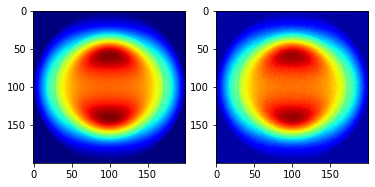

In [17]:
pattern_noise=pattern_exp+noise_factor * pattern_exp.max() * np.random.normal(size=pattern_exp.shape)

fig = plt.figure()
plt.subplot(121)
plt.imshow(pattern_exp, cmap='jet')
plt.subplot(122)
plt.imshow(pattern_noise, cmap='jet')
plt.show()

2021-08-27 21:28:03: Iteration Step  1


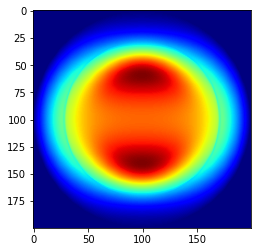

In [18]:
kx_grid_1d, ky_grid_1d = np.ravel(kx_grid), np.ravel(ky_grid)
kxy = np.transpose(np.vstack((kx_grid_1d, ky_grid_1d)))
angle_exp = np.array([np.pi * 0.5, np.pi * 0, np.pi * 0])
p1_exp, p2_exp = D1.Cal_Dipole_From_Angle(angle_exp)
pattern_exp_1d=D1.Cal_Pattern_List_QD_Fit_Angle(kxy,angle_exp[0], angle_exp[1], angle_exp[2])
# # %%
pattern_exp_re = np.reshape(pattern_exp_1d, (num_kx, num_ky))
fig = plt.figure()
plt.imshow(pattern_exp_re, cmap='jet')
plt.show()

In [19]:
para_bounds = ([0, 0, 0], [np.pi, 2*np.pi, 2*np.pi])
angel_fit,errors = D1.BFP_Curvefit_List_Angle(kxy, np.ravel(pattern_noise), [
                            0.5*np.pi+0.1, 0.11, 0.1], para_bounds)

2021-08-27 21:28:11: Begin To Fit
2021-08-27 21:28:11: Iteration Step  1
2021-08-27 21:28:11: Iteration Step  2
2021-08-27 21:28:11: Iteration Step  3
2021-08-27 21:28:11: Iteration Step  4
2021-08-27 21:28:11: Iteration Step  5
2021-08-27 21:28:11: Iteration Step  6
2021-08-27 21:28:11: Iteration Step  7
2021-08-27 21:28:11: Iteration Step  8
2021-08-27 21:28:11: Iteration Step  9
2021-08-27 21:28:11: Iteration Step  10
2021-08-27 21:28:11: Iteration Step  11
2021-08-27 21:28:11: Iteration Step  12
2021-08-27 21:28:12: Iteration Step  13
2021-08-27 21:28:12: Iteration Step  14
2021-08-27 21:28:12: Iteration Step  15
2021-08-27 21:28:12: Iteration Step  16
2021-08-27 21:28:12: Iteration Step  17
2021-08-27 21:28:12: Iteration Step  18
2021-08-27 21:28:12: Iteration Step  19
2021-08-27 21:28:12: Iteration Step  20
2021-08-27 21:28:12: Iteration Step  21
2021-08-27 21:28:12: Iteration Step  22
2021-08-27 21:28:12: Iteration Step  23
2021-08-27 21:28:12: Iteration Step  24
2021-08-27 21:2

In [20]:
Pattern_fit_1d = D1.Cal_Pattern_List_QD_Fit_Angle(
     kxy, angel_fit[0], angel_fit[1], angel_fit[2])
Pattern_fit=np.reshape(Pattern_fit_1d,(num_kx,num_ky))
p_rho_exp, p_phi_exp = D1.Trans_XY_to_RhoPhi(
    kx_grid, ky_grid, pattern_noise, kx_grid_in, ky_grid_in)
p_rho_fit, p_phi_fit = D1.Trans_XY_to_RhoPhi(
    kx_grid, ky_grid, Pattern_fit, kx_grid_in, ky_grid_in)

2021-08-27 21:28:20: Iteration Step  81


C:\Users\knifelee\AppData\Local\Temp/ipykernel_13584/2244810780.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(kx_grid, ky_grid, abs(pattern_noise),
C:\Users\knifelee\AppData\Local\Temp/ipykernel_13584/2244810780.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(kx_grid, ky_grid, abs(Pattern_fit),


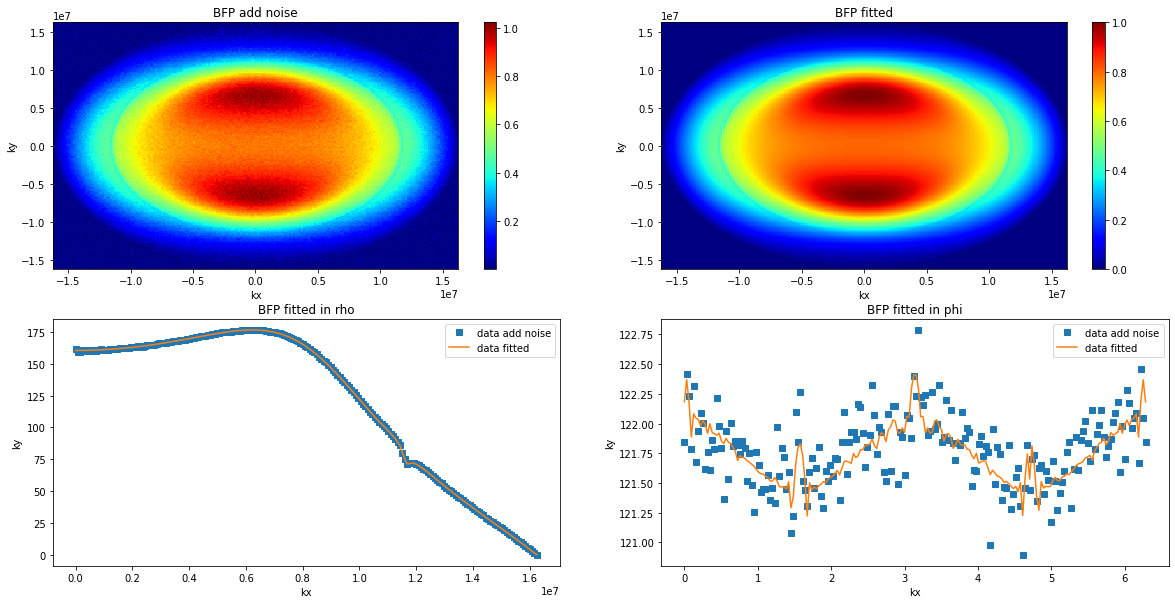

In [21]:
fig5=plt.figure(figsize=(20,10))
plt.subplot(221)
plt.pcolormesh(kx_grid, ky_grid, abs(pattern_noise),
                cmap='jet')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar()
plt.title('BFP add noise')

plt.subplot(222)
plt.pcolormesh(kx_grid, ky_grid, abs(Pattern_fit),
                cmap='jet')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar()
plt.title('BFP fitted')

plt.subplot(223)
plt.plot(krho, p_rho_exp,'s',label='data add noise')
plt.plot(krho, p_rho_fit,'-',label='data fitted')
plt.xlabel('kx')
plt.ylabel('ky')
plt.legend(loc='best')
plt.title('BFP fitted in rho')

plt.subplot(224)
plt.plot(kphi, p_phi_exp,'s',label='data add noise')
plt.plot(kphi, p_phi_fit,'-',label='data fitted')
plt.xlabel('kx')
plt.ylabel('ky')
plt.title('BFP fitted in phi')
plt.legend(loc='best')
plt.savefig('./Figures/Fitted_Resutls_Test_Full.png')
plt.show()